# Desalination Plant Outage Analysis

## Part I: <span style="color:blue">Descriptive Statistics</span>

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

%matplotlib inline


### Step 1: <span style="color:green">Descriptive Statistics</span> 
Merge 3 given files into a complete dataframe for the analysis. 

In [6]:
df1 = pd.read_csv('Desalination_Unit_File_001.csv', header=1) 
df2 = pd.read_csv('Desalination_Unit_File_002.csv', header=1) 
df3 = pd.read_csv('Desalination_Unit_File_003.csv', header=1) 
df = pd.concat([df1, df2, df3])

print(df.describe().info())
df.set_index('TIMEFRAME')
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SURJEK_FLOW_METER_1          8 non-null      float64
 1   SURJEK_FLOW_METER_2          8 non-null      float64
 2   ROTATIONAL_PUMP_RPM          8 non-null      float64
 3   SURJEK_PUMP_TORQUE           8 non-null      float64
 4   MAXIMUM_DAILY_PUMP_TORQUE    8 non-null      float64
 5   SURJEK_AMMONIA_FLOW_RATE     8 non-null      float64
 6   SURJEK_TUBE_PRESSURE         8 non-null      float64
 7   SURJEK_ESTIMATED_EFFICIENCY  8 non-null      float64
 8   PUMP FAILURE (1 or 0)        8 non-null      float64
dtypes: float64(9)
memory usage: 640.0+ bytes
None
(6998, 10)


### Step 2: <span style="color:green">Create a Boxplot</span> 


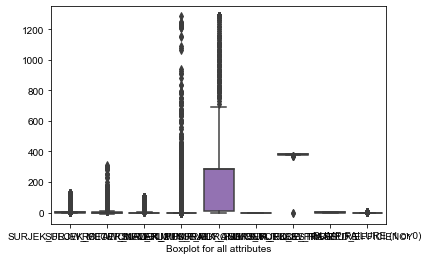

In [3]:
sns.boxplot(data=df)
plt.xlabel('Boxplot for all attributes')
plt.rcParams['figure.figsize'] = (25,5)
sns.set()

### Step 3: <span style="color:green">Create a Filtered Boxplot</span>  
i) Create the same boxplot from  <span style="color:green">Step 2</span>, but this time, filter out SURJEK_PUMP_TORQUE and MAXIMUM_DAILY_PUMP_TORQUE. Create a new dataframe and apply a filter named **'dataframe_filt'**. Title this boxplot 'Boxplot without Pump Torque, or Max Daily Pump Torque'.  

What attributes seem to 'stand out'?

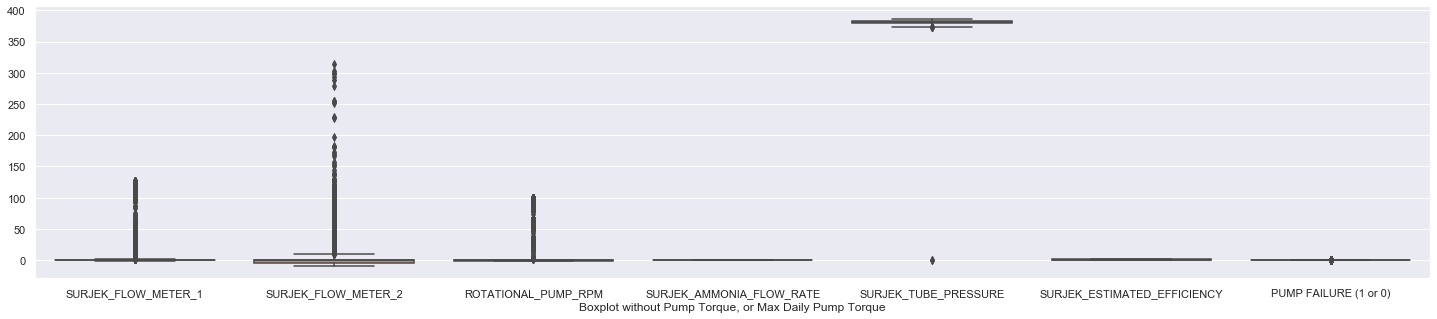

In [4]:
df_filt=df[['SURJEK_FLOW_METER_1','SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
      'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']]
sns.boxplot(data=df_filt)
plt.xlabel('Boxplot without Pump Torque, or Max Daily Pump Torque')
plt.rcParams['figure.figsize'] = (25,5)
sns.set()

### Step 4: <span style="color:green">Filter Boxplot by Column Value</span> 

i) Using the whole dataset, create another boxplot using the whole dataset but this time, compare the distributions for when Pump Failure is 1 (The Pump has failed) and 0 (Pump is in normal operations). Create two boxplots using the 'PUMP FAILURE (1 or 0)' column in the dataset. 

What variables seem to have the largest variation when the Pump has failed?

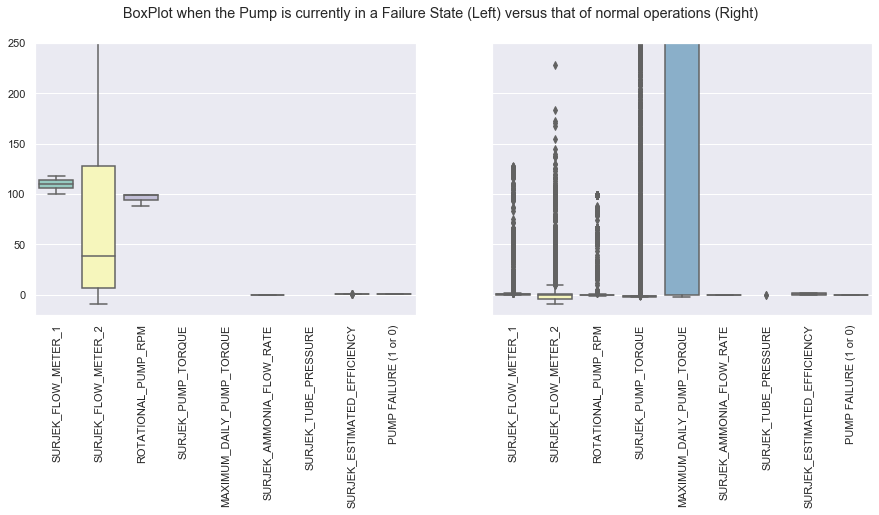

In [5]:
df_boxplots = df[df['PUMP FAILURE (1 or 0)']==1]
mpl.rcParams['figure.figsize'] = (15,5)
f, axes = plt.subplots(1, 2, sharey=True)

f.suptitle("BoxPlot when the Pump is currently in a Failure State (Left) versus that of normal operations (Right)")
sns.boxplot(data=df_boxplots, orient='v', palette='Set3', ax=axes[0])

df_boxplots = df[df['PUMP FAILURE (1 or 0)']==0]
sns.boxplot(data=df_boxplots, orient='v', palette='Set3', ax=axes[1])

for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
    
plt.show()

### Step 5: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

In [6]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR= Q3 - Q1
print(IQR)

SURJEK_FLOW_METER_1              0.704162
SURJEK_FLOW_METER_2              5.748178
ROTATIONAL_PUMP_RPM              0.687240
SURJEK_PUMP_TORQUE               0.350032
MAXIMUM_DAILY_PUMP_TORQUE      276.315522
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE             3.662100
SURJEK_ESTIMATED_EFFICIENCY      1.240724
PUMP FAILURE (1 or 0)            0.000000
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

How many outliers are there? What will happen to the dataset outliers are all removed? Let's find out!

i) Calculate how many entries currently are there in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries would be there outliers are all removed.

ii) Find the proportion of outliers that exist in the dataset.

In [7]:
entries=len(df)
print ("When we have not removed any outliers from the dataset, we have " + str(entries) + " entries") 

When we have not removed any outliers from the dataset, we have 6998 entries


In [8]:
# 2. TRIM Outliers
df_o = df[~((df < (Q1 - 1.5*IQR)) |(df > (Q3 + 1.5*IQR))).any(axis=1)]
left=len(df_o)
print(df_o.shape)

(3855, 10)


In [9]:
print ("When we have removed any outliers from the dataset, we have " + str(left) + " entries")

When we have removed any outliers from the dataset, we have 3855 entries


In [10]:
# 3. Proportion = Outliers / Total 
proportion = (3855/6998)*100
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(proportion))

The proportion of outliers which exist when compared to the dataframe are: 55.08716776221778


---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, for failure analysis, it is likely those outliers actually contain valuable insights to keep as they represent a deviation from the norm that need to be understood. 

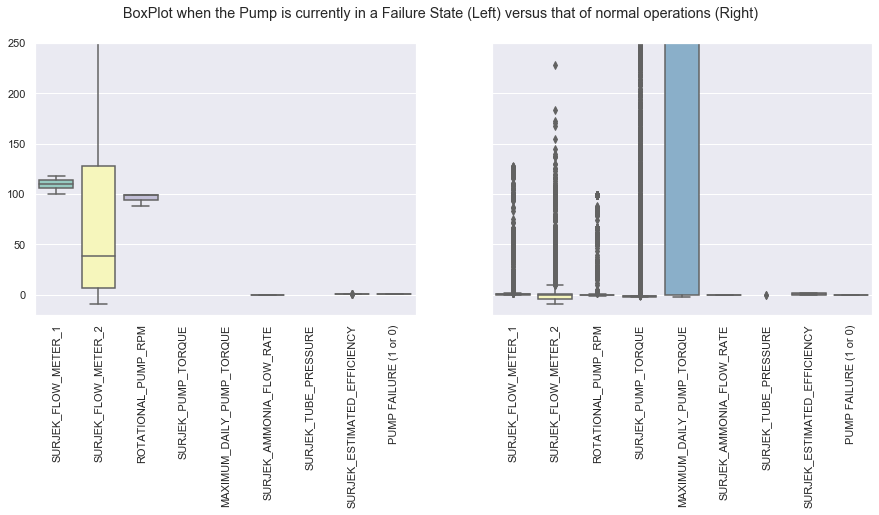

In [11]:
df_boxplots = df[df['PUMP FAILURE (1 or 0)']==1]
mpl.rcParams['figure.figsize'] = (15,5)
f, axes = plt.subplots(1, 2, sharey=True)

f.suptitle("BoxPlot when the Pump is currently in a Failure State (Left) versus that of normal operations (Right)")
sns.boxplot(data=df_boxplots, orient='v', palette='Set3', ax=axes[0])

df_boxplots = df[df['PUMP FAILURE (1 or 0)']==0]
sns.boxplot(data=df_boxplots, orient='v', palette='Set3', ax=axes[1])

for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
    
plt.show()

### Based on the boxplots above, in order to understand the Pump Failure Behavior, outliers shouldn't be removed. 

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

Using a loop, iterate through each of the Column Names and plot the data. 

Find the minimum (min) and maximum (max) time in the dataframe. Use Tight_layout. Include a title with min and max time. 

**Note:** For each plot, using a dual axis set up to see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute (e.g. SURJEK_FLOW_METER_1) on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view. 

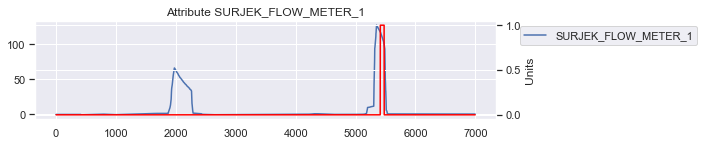

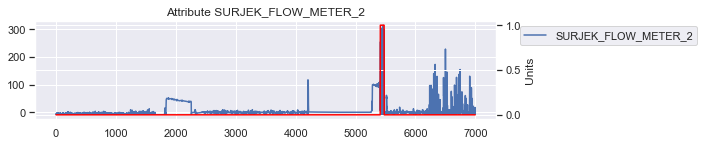

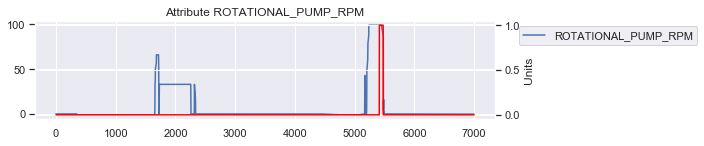

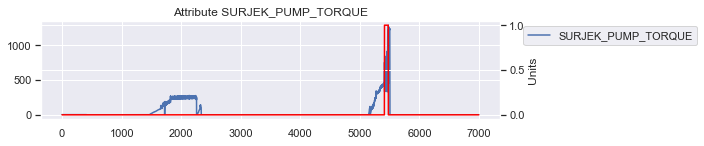

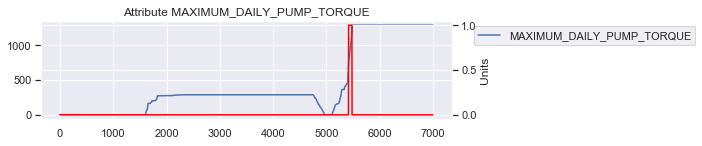

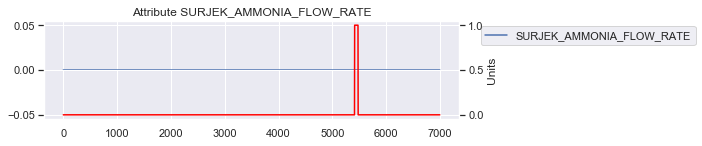

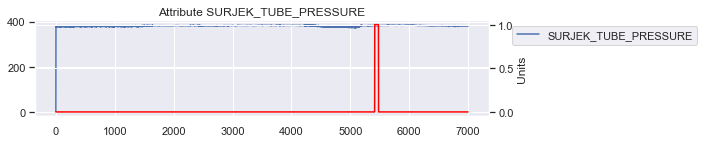

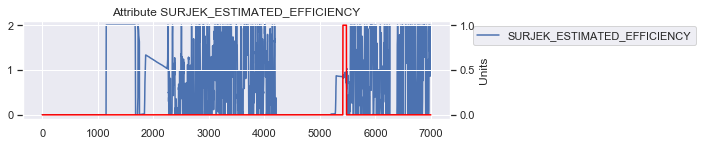

In [12]:
df = df.dropna()
df = df.reset_index()
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt2 = ['PUMP FAILURE (1 or 0)']
colList = df[filt].columns
mpl.rcParams['figure.figsize'] = (10,2)



for i in colList:
    fail = df[filt2]
    ax = df[i].plot()
    ax2 = ax.twinx()
    ax2.plot(fail, 'red')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    
    minTime = df.index.min()
    maxTime = df.index.max()
    plt.tight_layout()
    plt.title("Attribute " + i)
    plt.ylabel('Units')
    plt.show()



Of course, given that all the attributes have varying units, more plots are needed to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 


### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.


ii) Re-plot all variables for the time period 10/12/2014 14:40 to 10/12/2014 14:45, focusing specifically on the first Pump “Failure”. 


**Open-ended Question:**
Do any particular variables seem to move in relation to the failure event?

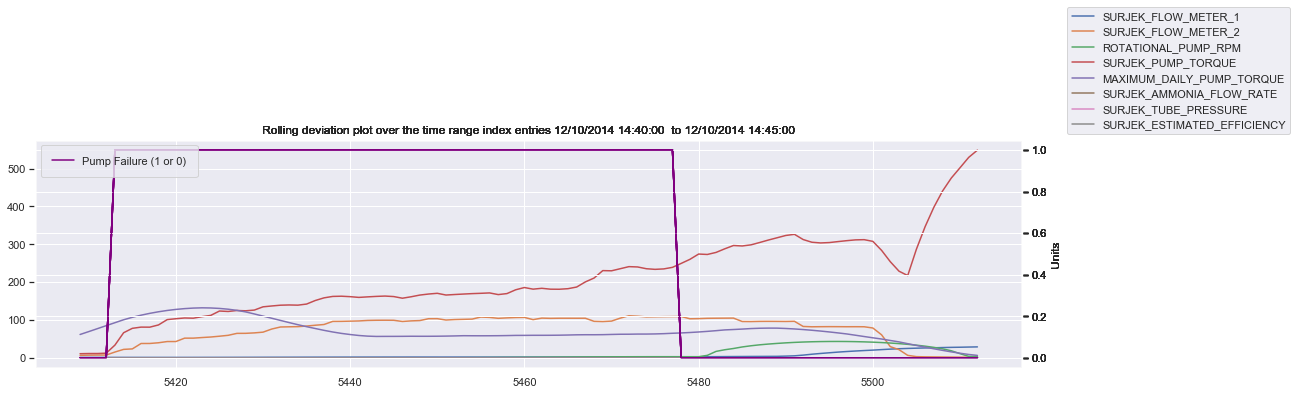

In [13]:
from datetime import datetime
timeframe=pd.concat([df1,df2,df3])
timeframe['TIMEFRAME'] = pd.to_datetime(timeframe['TIMEFRAME']).apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S')if not pd.isnull(x) else '')
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)', 'TIMEFRAME']
filt2 = ['PUMP FAILURE (1 or 0)']
filt3 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
colList = timeframe[filt].columns
mpl.rcParams['figure.figsize'] = (15,4)
timeframe.reset_index(drop=True,inplace=True)



rollingDF = timeframe[filt3].rolling(30).std()
rollingDF = rollingDF.join(timeframe[['PUMP FAILURE (1 or 0)', 'TIMEFRAME']], how='inner')
rollingDF_filter = rollingDF.loc[(rollingDF['TIMEFRAME'] >= "12/10/2014 14:40:00")&(rollingDF['TIMEFRAME'] <="12/10/2014 14:45:00")]

fig = plt.figure()
ax = plt.axes()

#Loop through the Plot
for i in filt3:
    ax.plot(rollingDF_filter.index, rollingDF_filter[i], label=i)
    ax2 = ax.twinx()
    ax2.plot(rollingDF_filter[filt2], 'purple', label='Pump Failure (1 or 0)')
    
    ax.xaxis.set_tick_params(rotation=0)

    plt.tight_layout()
    minTime = rollingDF_filter['TIMEFRAME'].min()
    maxTime= rollingDF_filter['TIMEFRAME'].max()
    plt.title("Rolling deviation plot over the time range index entries " + str(minTime) + " " +  " to " + str(maxTime))
    plt.ylabel('Units')
    
ax.legend(bbox_to_anchor=(1.04,1), loc="lower left")   
ax2.legend(loc='upper left', borderpad=1)
plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).


Text(0.5, 1, 'Correlation Matrix')

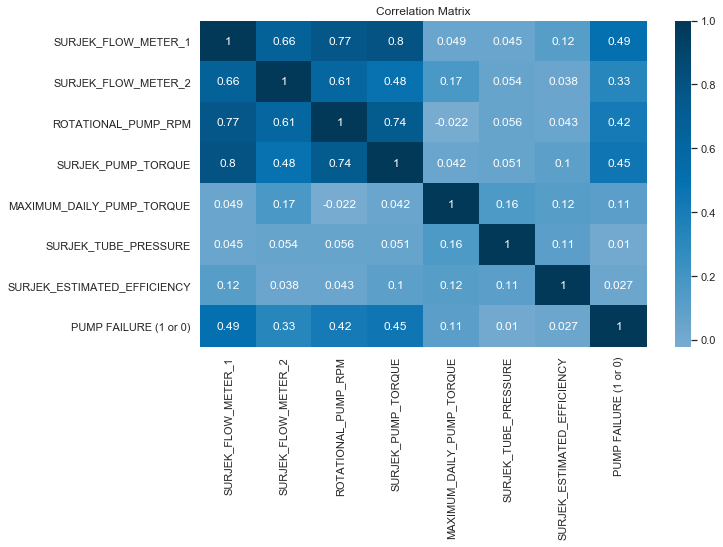

In [14]:
from datetime import datetime
dataframe = pd.concat([df1,df2,df3])
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)

filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
dataframe = dataframe[filt]

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dataframe.corr(), center=0, cmap='PuBu',annot=True)
ax.set_title("Correlation Matrix")

**Open-ended Question:**

Which variables seem to correlate with Pump Failure?

### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

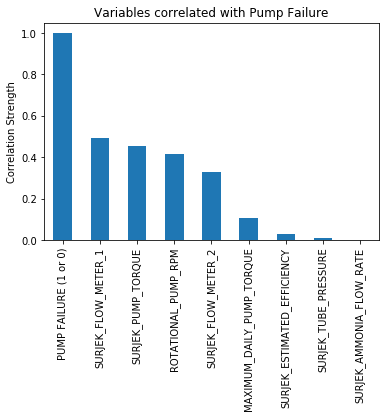

In [7]:
corr = df.corr()
corr = corr.sort_values("PUMP FAILURE (1 or 0)", ascending=False)
corr['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.title("Variables correlated with Pump Failure")
plt.ylabel("Correlation Strength")
plt.show()

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Transform 'raw' variables using a rolling standard deviation. 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Using the newly created rolling standard deviation dataframe, use the Seaborn heatmap function to replot this dataframe into a heatmap.

Do any variables stand out? 

Text(0.5, 1, 'Correlation Matrix')

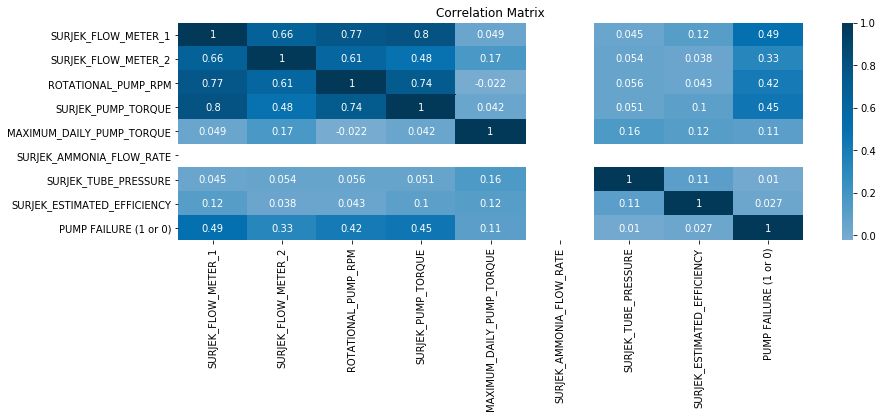

In [9]:
dataframe = pd.concat([df1,df2,df3])
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']


fig, ax = plt.subplots(figsize=(14,4))
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
sns.heatmap(dataframe.corr(), center=0, cmap='PuBu',annot=True)
ax.set_title("Correlation Matrix")

### Creating a Multivariate Regression Model


Using the statsmodel.api library and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all independent variables, which include every other variable that is not PUMP FAILURE (1 or 0). 

ii) Repeat i) but this time use the rolling standard deviation variables from previously. What is the R Squared for the model and what does this signify?

**Open-ended Question:**

Which linear regression model seems to be a better fit?

In [20]:
dataframe_two = pd.concat([df1,df2,df3])
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']

dataframe_two = dataframe_two[filt]
dataframe_two['PumpFailure'] = dependentVar
dataframe_two = dataframe_two.fillna(0)
X = dataframe_two.drop(['PUMP FAILURE (1 or 0)', 'PumpFailure'],axis=1)
X = sm.add_constant(X)
y = dataframe_two['PumpFailure']
OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PumpFailure   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     358.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:16:39   Log-Likelihood:                 7548.9
No. Observations:                6998   AIC:                        -1.508e+04
Df Residuals:                    6990   BIC:                        -1.503e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1293      0.056      2.318      0.020       0.020       0.239
SURJEK_FLOW_METER_1             0.0017   9.98e-05     16.797      0.000       0.001       0.002
SURJEK_FLOW_METER_2            -0.0001   5.77e-05     -2.085      0.037      -0.000   -7.17e-06
ROTATIONAL_PUMP_RPM             0.0003   8.17e-05      4.110      0.000       0.000       0.000
SURJEK_PUMP_TORQUE              0.0001   1.43e-05      7.011      0.000    7.23e-05       0.000
MAXIMUM_DAILY_PUMP_TORQUE    2.036e-05   2.18e-06      9.321      0.000    1.61e-05    2.46e-05
SURJEK_AMMONIA_FLOW_RATE    -1.371e-18   4.45e-19     -3.083      0.002   -2.24e-18   -4.99e-19
SURJEK_TUBE_PRESSURE           -0.0004      0.000     -2.516      0.012      -0.001   -8.17e-05
SURJEK_ESTIMATED_EFFICIENCY    -0.0052      0.001     -3.866      0.000      -0.008      -0.003
==============================================================================
Omnibus:                     7983.490   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           972591.134
Skew:                           5.871   Prob(JB):                         0.00
Kurtosis:                      59.548   Cond. No.                     2.78e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
dataframe_two = pd.concat([df1,df2,df3])
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']


dataframe_two = dataframe_two[filt].rolling(30).std()
dataframe_two['PumpFailure'] = dependentVar
dataframe_two = dataframe_two.dropna()
dataframe_two = dataframe_two.reset_index(drop=True)
X = dataframe_two.drop(['PUMP FAILURE (1 or 0)', 'PumpFailure'],axis=1)
X = sm.add_constant(X)
y = dataframe_two['PumpFailure']
OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PumpFailure   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1662.
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:14:26   Log-Likelihood:                 9857.5
No. Observations:                6969   AIC:                        -1.970e+04
Df Residuals:                    6961   BIC:                        -1.964e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0123      0.001    -11.184      0.000      -0.014      -0.010
SURJEK_FLOW_METER_1            -0.0024      0.000     -7.291      0.000      -0.003      -0.002
SURJEK_FLOW_METER_2             0.0016   6.42e-05     25.601      0.000       0.002       0.002
ROTATIONAL_PUMP_RPM            -0.0065      0.000    -30.669      0.000      -0.007      -0.006
SURJEK_PUMP_TORQUE              0.0003   2.55e-05     10.093      0.000       0.000       0.000
MAXIMUM_DAILY_PUMP_TORQUE       0.0059   8.82e-05     66.887      0.000       0.006       0.006
SURJEK_AMMONIA_FLOW_RATE     2.653e-19    5.3e-20      5.005      0.000    1.61e-19    3.69e-19
SURJEK_TUBE_PRESSURE            0.0002      0.000      0.403      0.687      -0.001       0.001
SURJEK_ESTIMATED_EFFICIENCY     0.0026      0.002      1.122      0.262      -0.002       0.007
==============================================================================
Omnibus:                     2611.797   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           405452.773
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                      40.341   Cond. No.                     2.26e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Step 14: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation created in the previous step and apply the .predict() function to the dataframe to see whether or not the model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

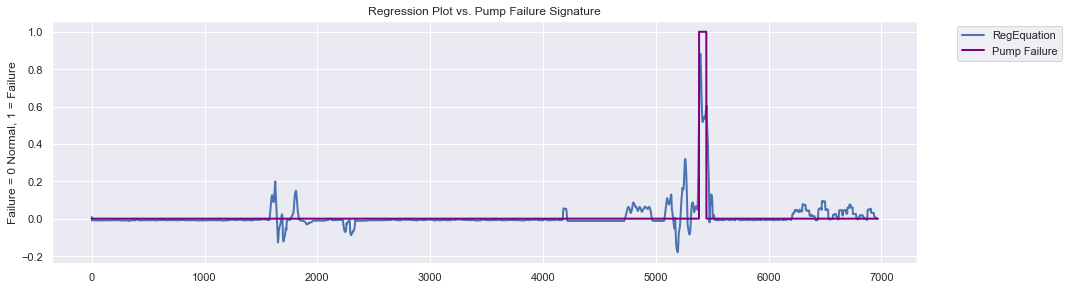

In [19]:
mpl.rcParams['figure.figsize'] = (15,4)



ax = OLSmodelResult.predict(X).plot(linewidth=2, marker='', label="RegEquation")
ax.set_ylabel("Regression Equation Prediction of Failre signal")
plt.ylabel("Failure = 0 Normal, 1 = Failure")
ax.plot(dataframe_two.PumpFailure, 'purple', linewidth=2, marker='',label='Pump Failure')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("Failure = 0 Normal, 1 = Failure")
plt.tight_layout()


plt.title("Regression Plot vs. Pump Failure Signature")
plt.show()
